<a href="https://colab.research.google.com/github/yashagrawal8329/Real-E-state/blob/main/avatar_gen_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating cyberpunk avatars with Steps=40, CFG=9.5...
Loading model on cuda...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Model loaded successfully.


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

--- Generated Avatars ---


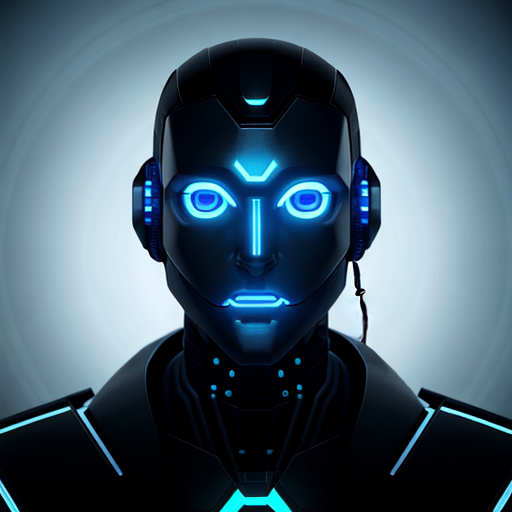

Saved to avatar_0_cyberpunk.png


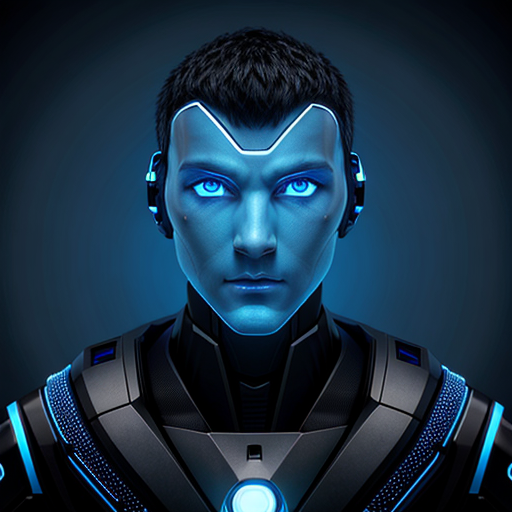

Saved to avatar_1_cyberpunk.png


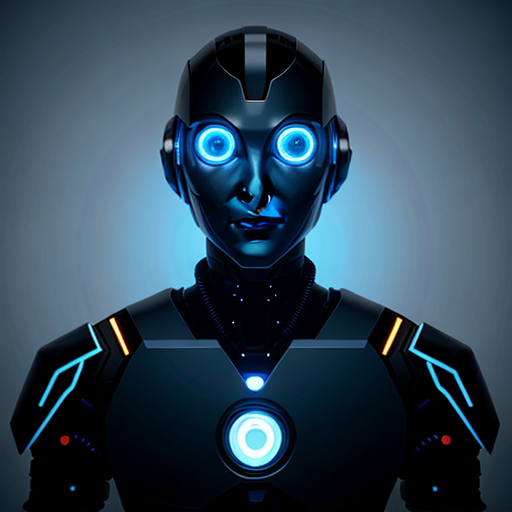

Saved to avatar_2_cyberpunk.png


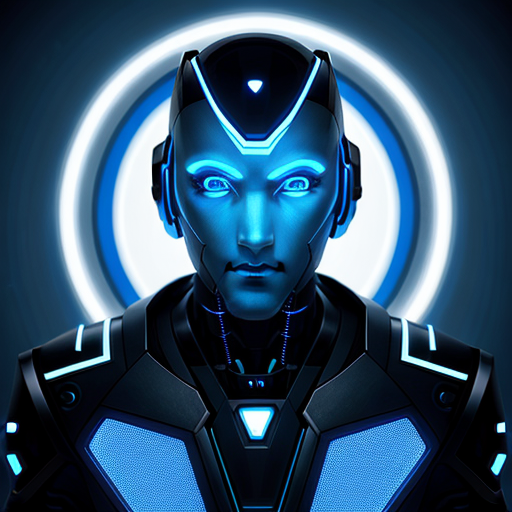

Saved to avatar_3_cyberpunk.png
Generation complete.


In [2]:
# app.py - Revised AvatarGenerator with Customizable Parameters

from diffusers import StableDiffusionPipeline
import torch
import random
from PIL import Image
from IPython.display import display as ipython_display

class AvatarGenerator:
    def __init__(self, model_name="stablediffusionapi/realistic-vision-v51"):
        # Initializing the pipeline (runs once)
        # Check for CUDA availability
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        print(f"Loading model on {self.device}...")

        # Load the pipeline with half-precision (float16) for speed on GPU
        self.pipe = StableDiffusionPipeline.from_pretrained(model_name, torch_dtype=torch.float16)
        self.pipe.to(self.device)
        print("Model loaded successfully.")

    def generate_avatar(self,
                        prompt,
                        style="realistic",
                        steps=35,           # NEW: Default step count (in range 30-50)
                        cfg_scale=8.5,      # NEW: Default CFG scale (in range 7-12)
                        num_variants=4):

        # Ensure steps and cfg_scale are within required bounds (optional safety check)
        steps = max(30, min(50, steps))
        cfg_scale = max(7.0, min(12.0, cfg_scale))

        # Style templates (same as before)
        style_templates = {
            "realistic": "A realistic avatar of {description}, clean background, centered, high quality, detailed face",
            "anime": "An anime avatar of {description}, clean background, centered, high quality, detailed face",
            "cartoon": "A cartoon avatar of {description}, clean background, centered, high quality, detailed face",
            "cyberpunk": "A cyberpunk avatar of {description}, clean background, centered, high quality, detailed face"
        }

        # Fallback for styles not in the dictionary
        selected_style_template = style_templates.get(style.lower(), style_templates["realistic"])

        full_prompt = selected_style_template.format(description=prompt)
        negative_prompt = "blurry, low quality, deformed, ugly, extra limbs, watermark, text"

        images = []
        for _ in range(num_variants):
            # Generate a random seed
            seed = random.randint(0, 10000000)
            generator = torch.Generator(device=self.device).manual_seed(seed)

            # Key change: Pass the customizable parameters to the pipeline
            image = self.pipe(
                full_prompt,
                negative_prompt=negative_prompt,
                num_inference_steps=steps,          # Uses the customizable 'steps'
                guidance_scale=cfg_scale,           # Uses the customizable 'cfg_scale'
                generator=generator
            ).images[0]

            images.append(image)
        return images

# Example usage for Colab to test the new parameters
if __name__ == "__main__":
    test_style = "cyberpunk"
    test_prompt = "A friendly male robot avatar, blue glowing eyes, minimalistic design"

    # Custom settings for testing
    custom_steps = 40
    custom_cfg = 9.5

    print(f"Generating {test_style} avatars with Steps={custom_steps}, CFG={custom_cfg}...")

    # The first time this runs, it may download the model (if not authenticated yet)
    gen = AvatarGenerator()

    avatars = gen.generate_avatar(
        test_prompt,
        style=test_style,
        steps=custom_steps,
        cfg_scale=custom_cfg,
        num_variants=4
    )

    print("--- Generated Avatars ---")
    for i, img in enumerate(avatars):
        # Display the image directly in the Colab output
        ipython_display(img)
        # Save the image to the Colab file system
        file_name = f"avatar_{i}_{test_style}.png"
        img.save(file_name)
        print(f"Saved to {file_name}")
    print("Generation complete.")